In [1]:
import matplotlib as mpl; mpl.use('pgf')

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from etudes.datasets import load_bee_dance_data

In [4]:
golden_ratio = 0.5 * (1 + np.sqrt(5))
golden_size = lambda width: (width, width / golden_ratio)

In [5]:
width_pt = 3 * 234.8775 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27 # Convert pt to inches
width = width_pt * inches_per_pt # width in inches

rc = {
    "figure.figsize": golden_size(width),
    "font.serif": ['Times New Roman'],
    "text.usetex": True,
}

sns.set(context="notebook", style="ticks", palette="colorblind", font="serif", rc=rc)

In [6]:
data = load_bee_dance_data(base_dir="../datasets")
data = data.assign(label=data.label.map(dict(waggle="waggle", 
                                             turn_right="turn right", 
                                             turn_left="turn left")))

In [7]:
data

,x,y,t,label,timestamp,change_point,phase,sequence
0,320.000000,211.000000,2.746665,turn right,33,True,1,1
1,320.349698,209.310842,2.947362,turn right,66,False,1,1
2,317.249308,210.492133,2.803752,turn right,99,False,1,1
3,314.729549,210.789226,2.452338,turn right,132,False,1,1
4,312.833111,212.315452,2.681583,turn right,165,False,1,1
...,...,...,...,...,...,...,...,...
604,460.422421,255.308738,-1.532037,turn right,19932,False,16,6
605,460.355204,255.057431,-1.395461,turn right,19965,False,16,6
606,455.472991,253.271702,-1.135847,turn right,19998,False,16,6
607,452.110165,252.567149,-0.894756,turn right,20031,False,16,6


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


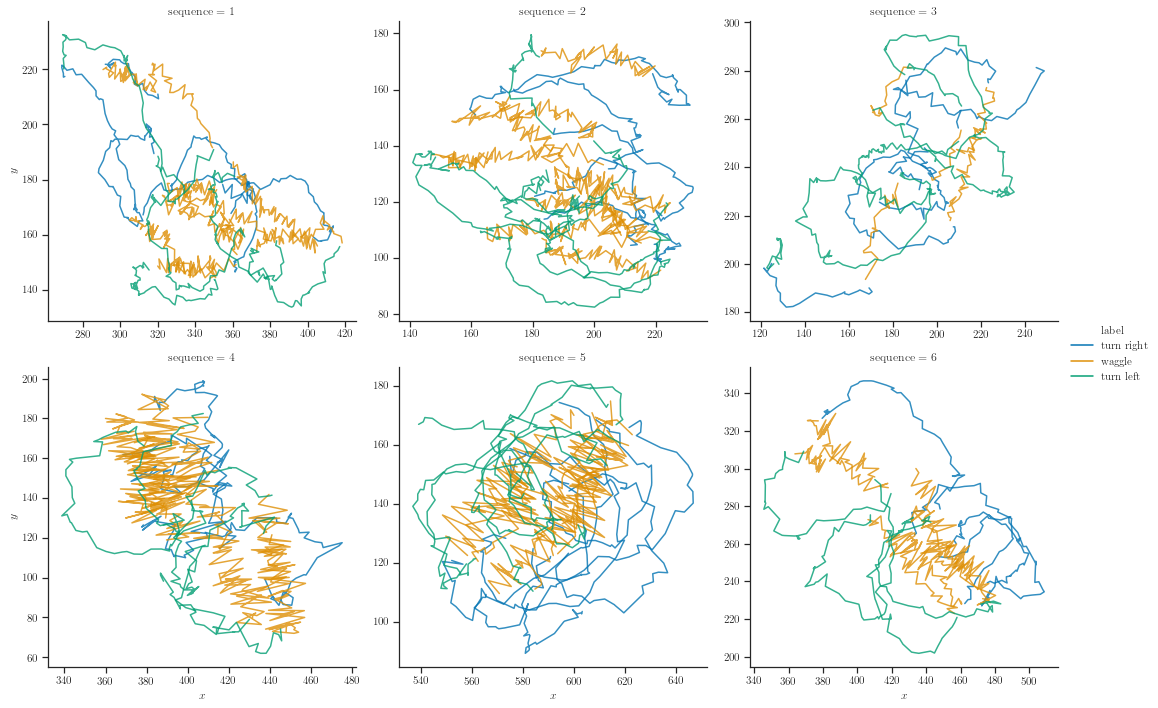

In [8]:
g = sns.relplot(x='x', y='y', units='phase', estimator=None, hue="label", 
                col="sequence", col_wrap=3, kind="line", sort=False, 
                data=data, height=5, aspect=1, alpha=0.8, 
                facet_kws=dict(sharex=False, sharey=False))
g.set_axis_labels(r"$x$", r"$y$")

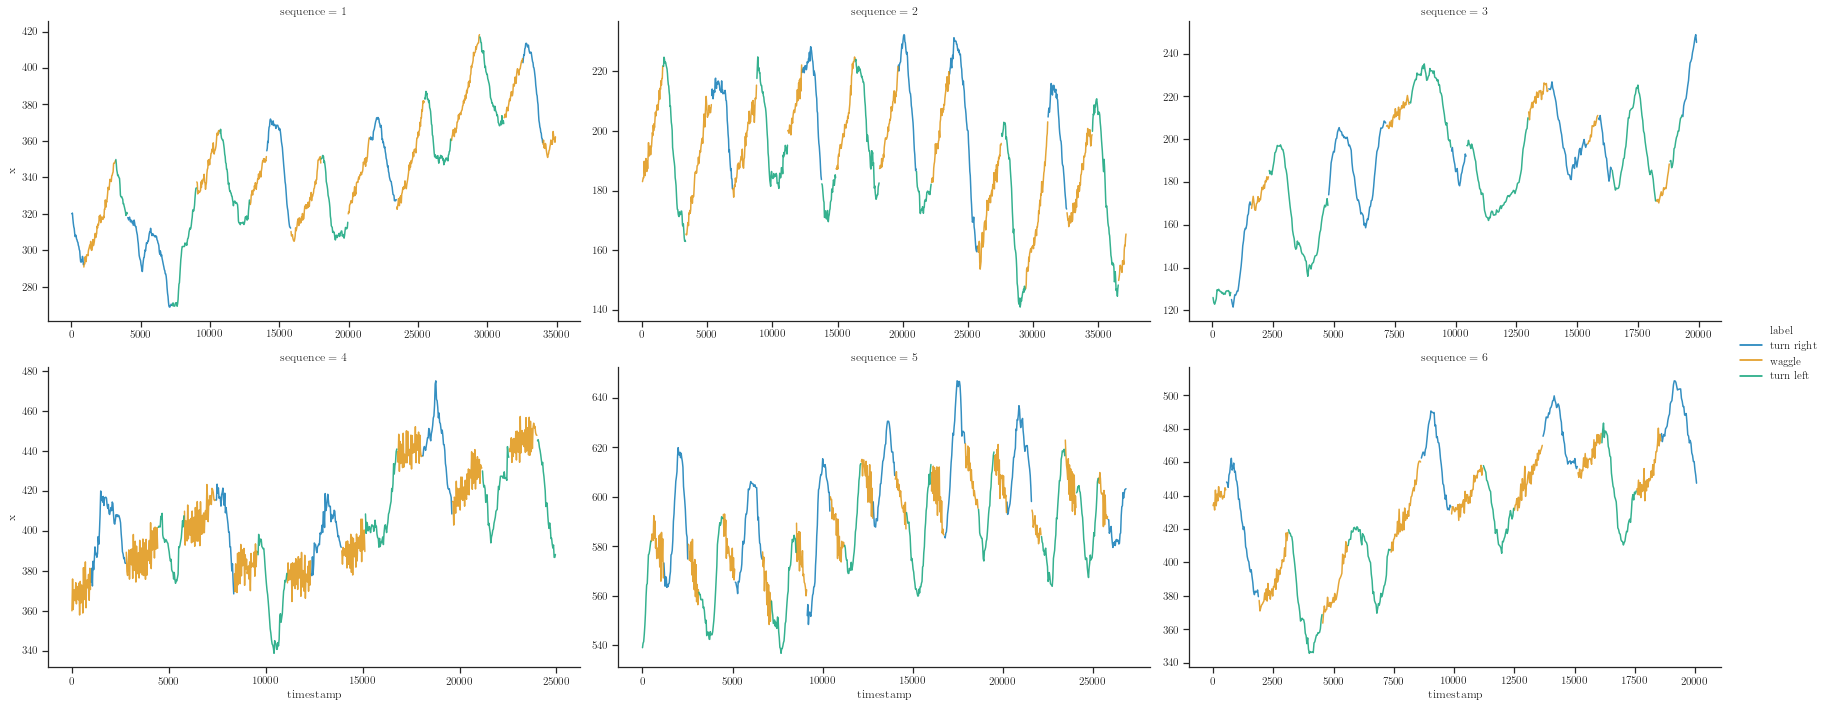

In [13]:
sns.relplot(x="timestamp", y="x", units='phase', estimator=None, hue="label",
            col="sequence", col_wrap=3, kind="line", 
            data=data, height=5, aspect=golden_ratio,
            alpha=0.8, facet_kws=dict(sharex=False, sharey=False))

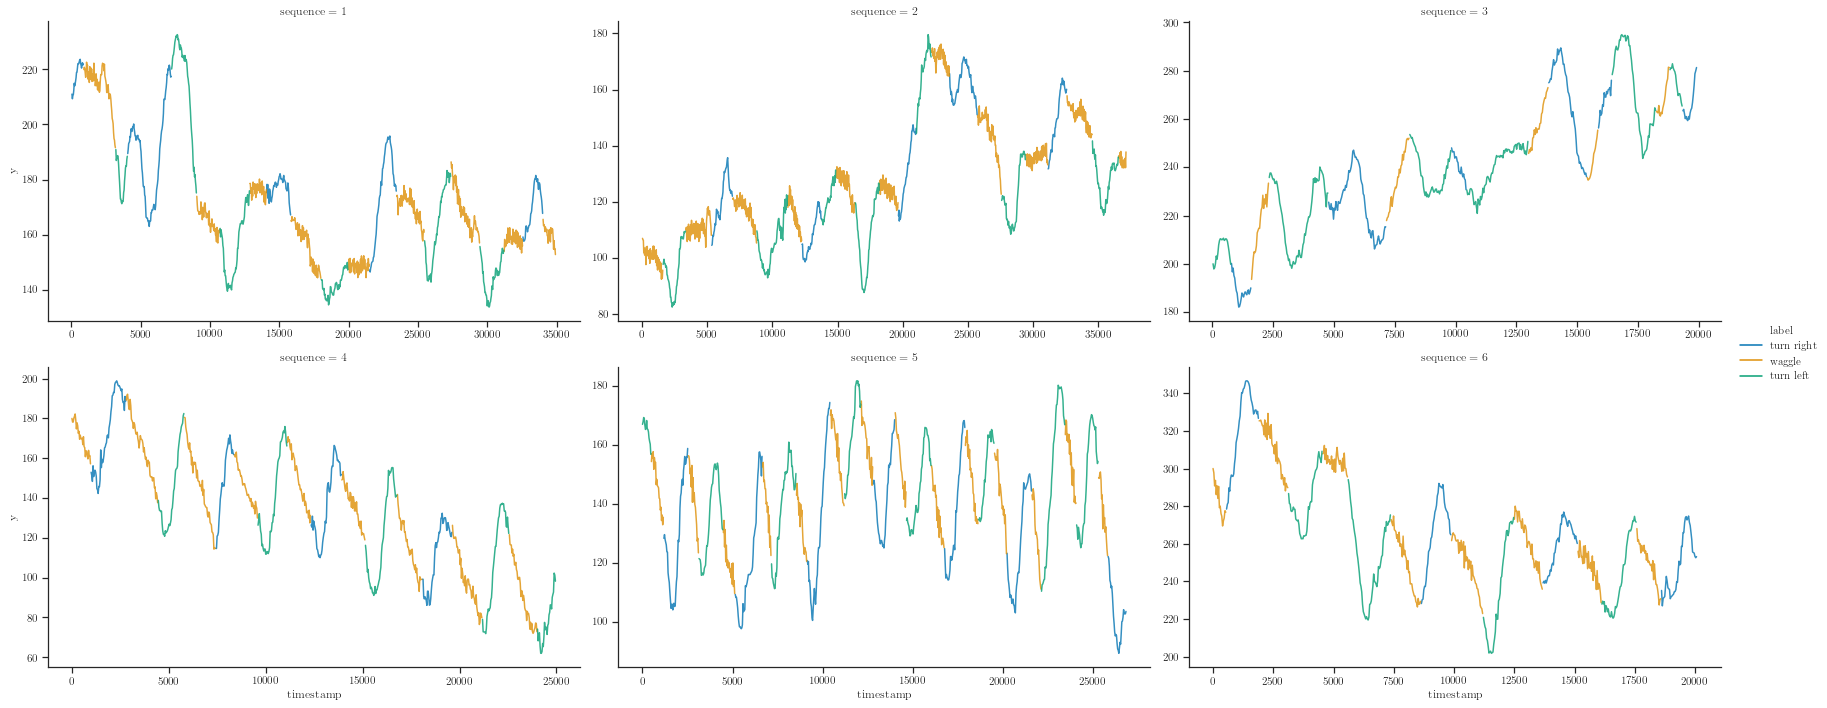

In [14]:
sns.relplot(x="timestamp", y="y", units='phase', estimator=None, hue="label",
            col="sequence", col_wrap=3, kind="line", 
            data=data, height=5, aspect=golden_ratio,
            alpha=0.8, facet_kws=dict(sharex=False, sharey=False))

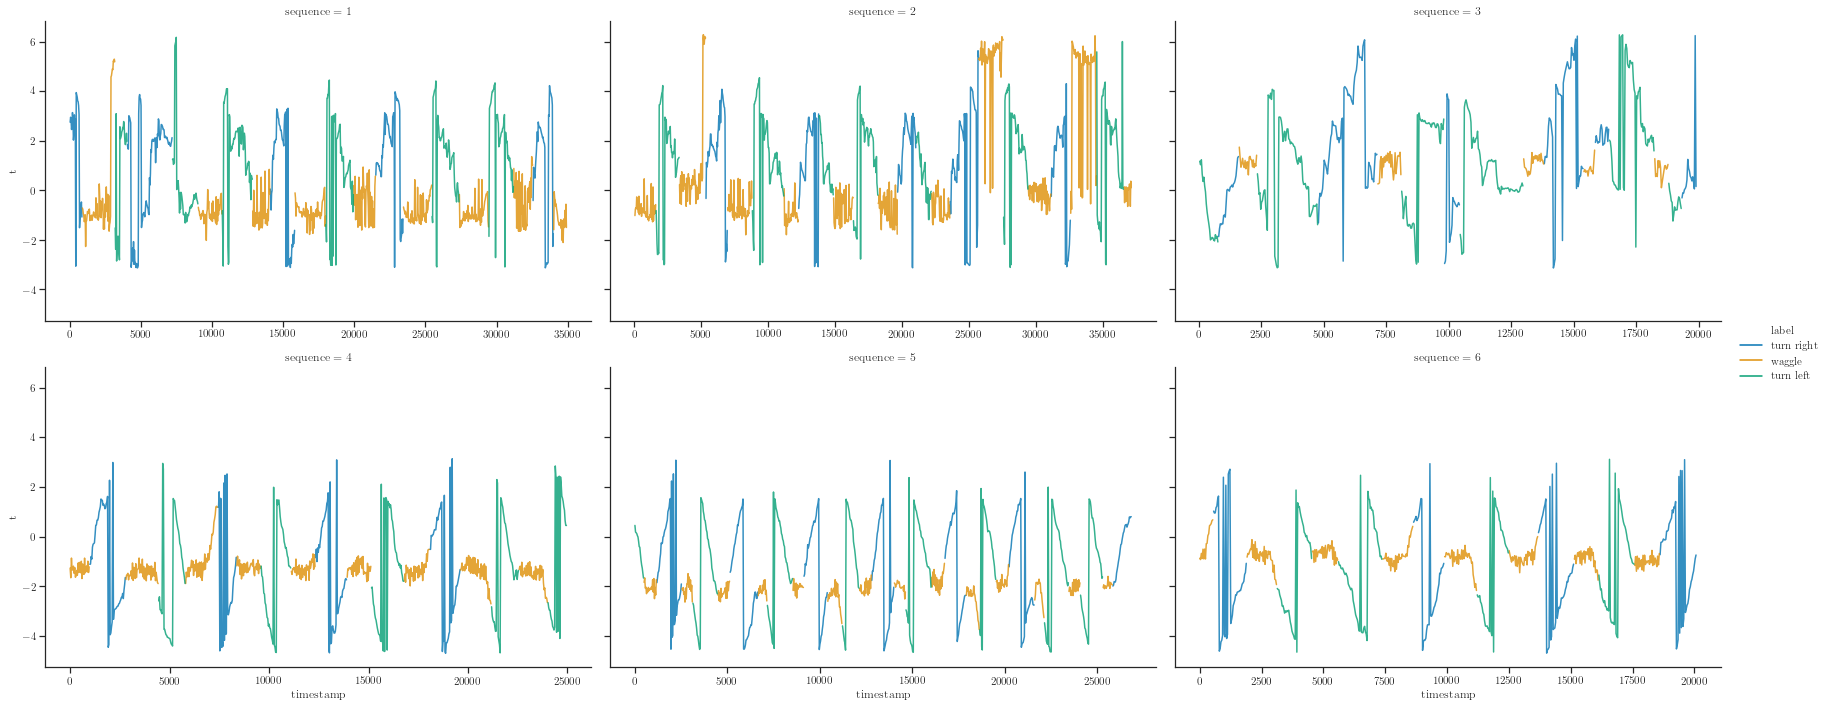

In [15]:
g = sns.relplot(x="timestamp", y="t", units='phase', estimator=None, hue="label",
                col="sequence", col_wrap=3, kind="line", 
                data=data, height=5, aspect=golden_ratio,
                alpha=0.8, facet_kws=dict(sharex=False))
g.savefig("angle.pdf")

In [16]:
long_data = data.melt(id_vars=["sequence", "timestamp", "label"], value_vars=['x', 'y'], var_name="signal")
long_data

,sequence,timestamp,label,signal,value
0,1,33,turn right,x,320.000000
1,1,66,turn right,x,320.349698
2,1,99,turn right,x,317.249308
3,1,132,turn right,x,314.729549
4,1,165,turn right,x,312.833111
...,...,...,...,...,...
9927,6,19932,turn right,y,255.308738
9928,6,19965,turn right,y,255.057431
9929,6,19998,turn right,y,253.271702
9930,6,20031,turn right,y,252.567149


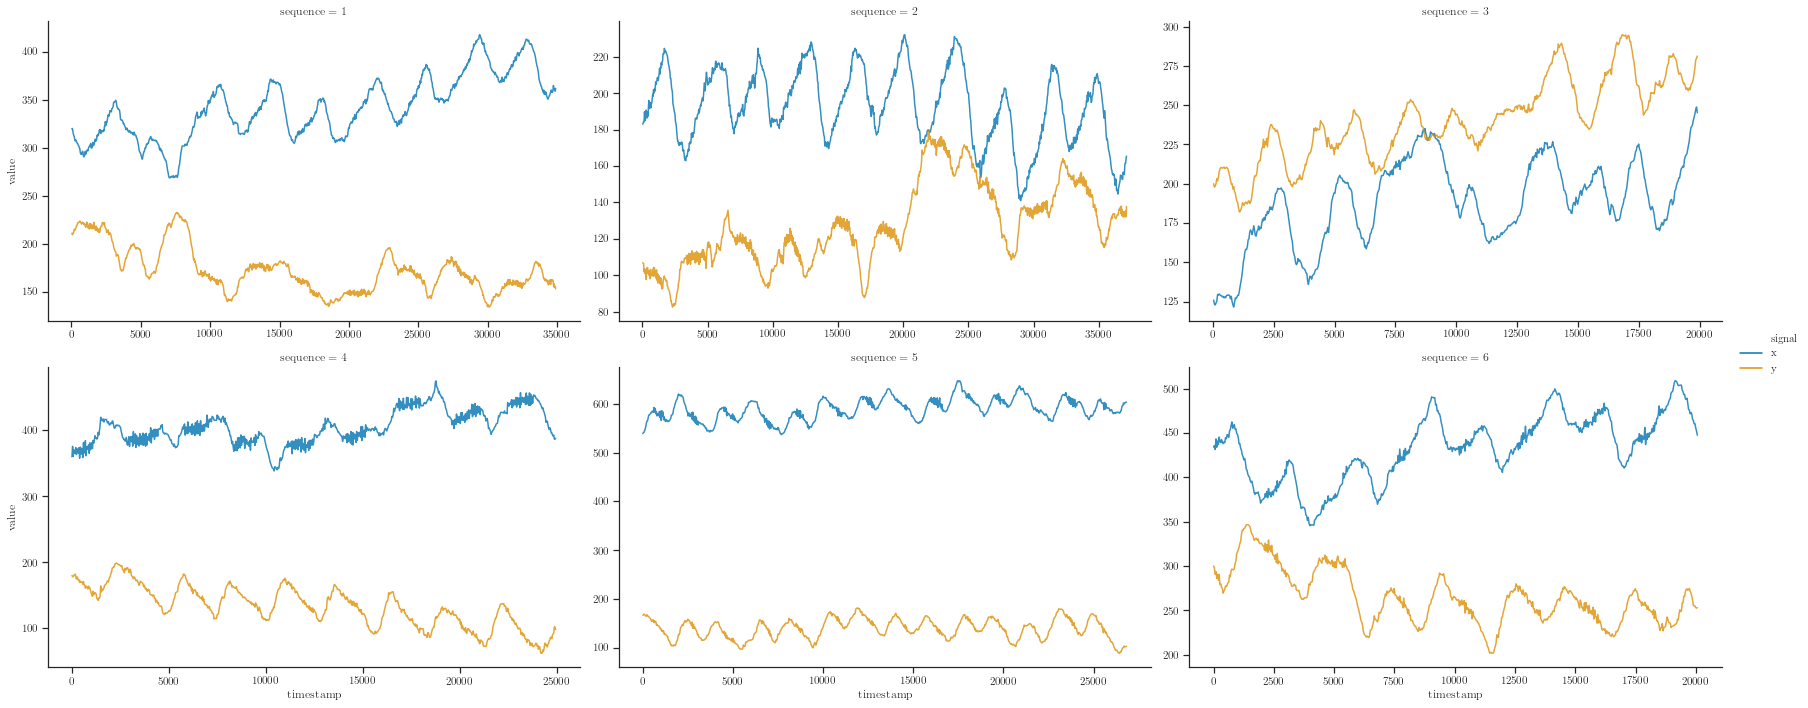

In [17]:
sns.relplot(x="timestamp", y="value", hue="signal",
            col="sequence", col_wrap=3, kind="line", 
            data=long_data, height=5, aspect=golden_ratio,
            alpha=0.8, facet_kws=dict(sharex=False, sharey=False))

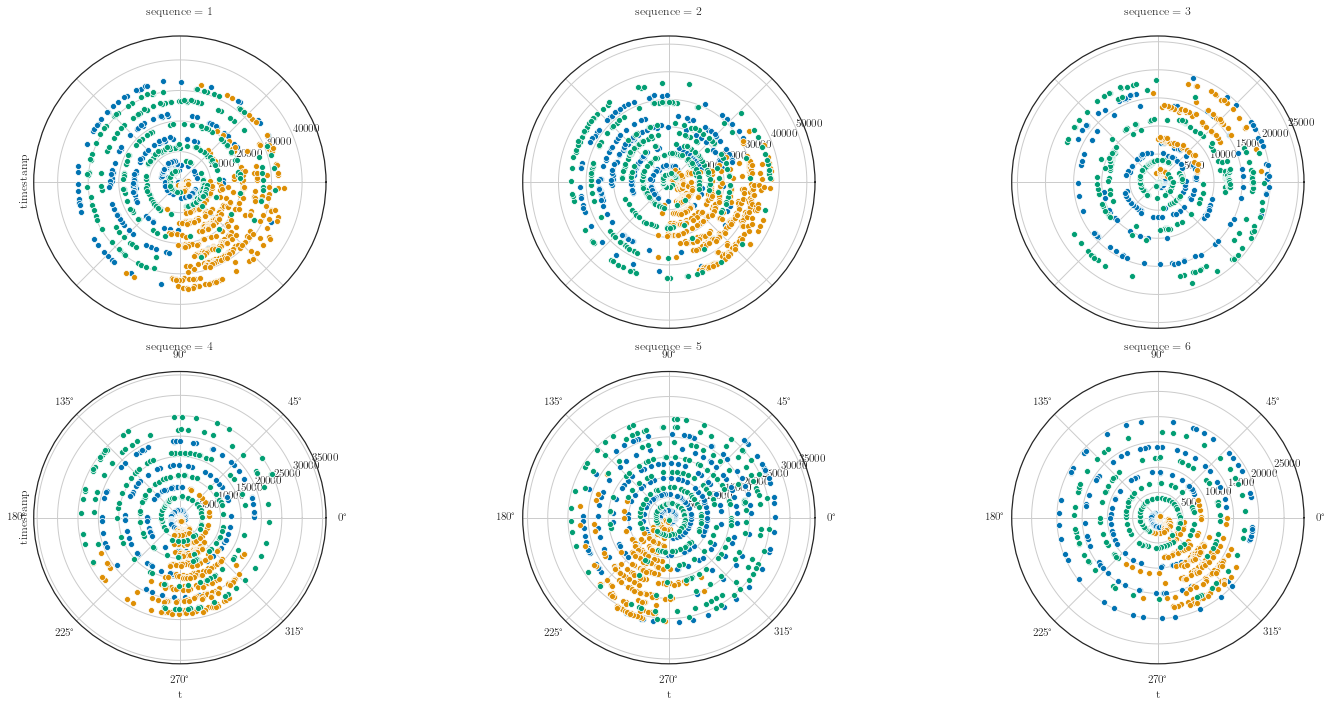

In [18]:
g = sns.FacetGrid(data, hue="label", col="sequence", col_wrap=3, 
                  height=5, aspect=golden_ratio,
                  subplot_kws=dict(projection='polar'), 
                  sharey=False, despine=False)
g.map(sns.scatterplot, "t", "timestamp")

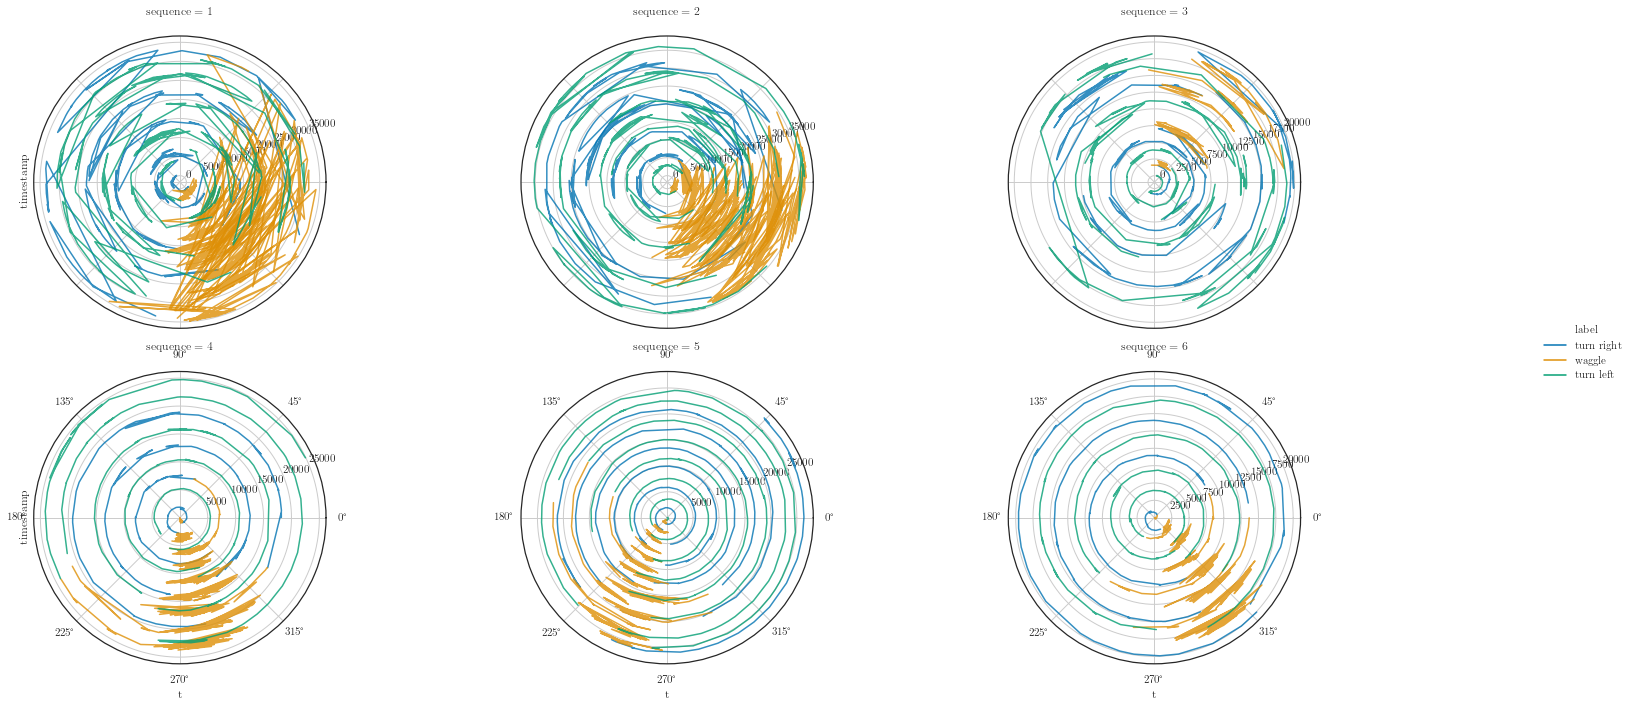

In [19]:
g = sns.relplot(x="t", y="timestamp", units='phase', estimator=None, hue="label", 
                col="sequence", col_wrap=3, kind="line", sort=False,
                data=data, height=5, aspect=golden_ratio,
                alpha=0.8, facet_kws=dict(subplot_kws=dict(projection='polar'), sharey=False, despine=False))